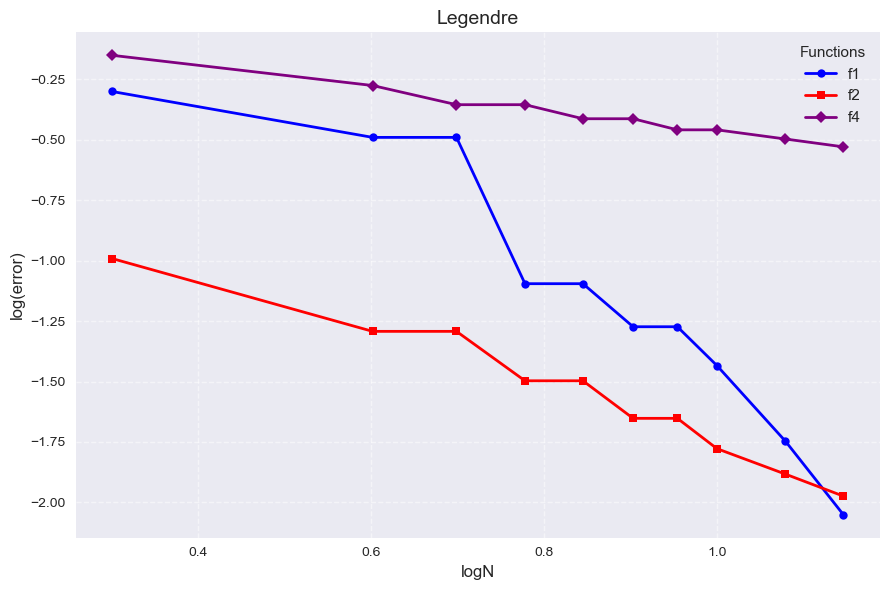

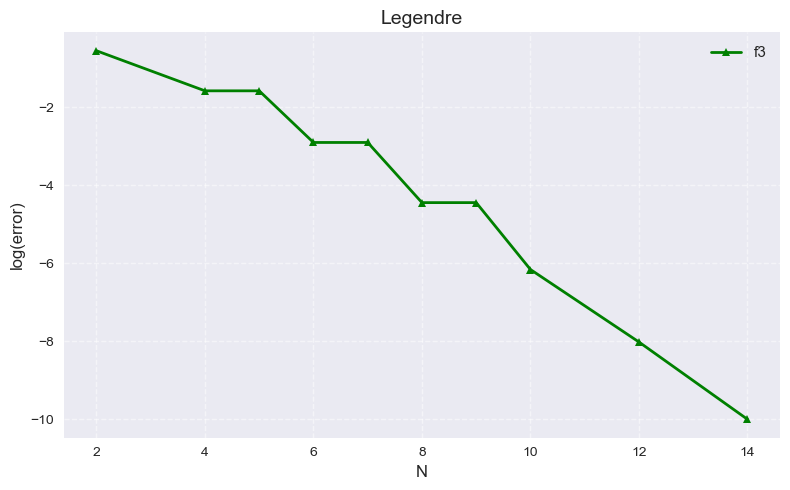

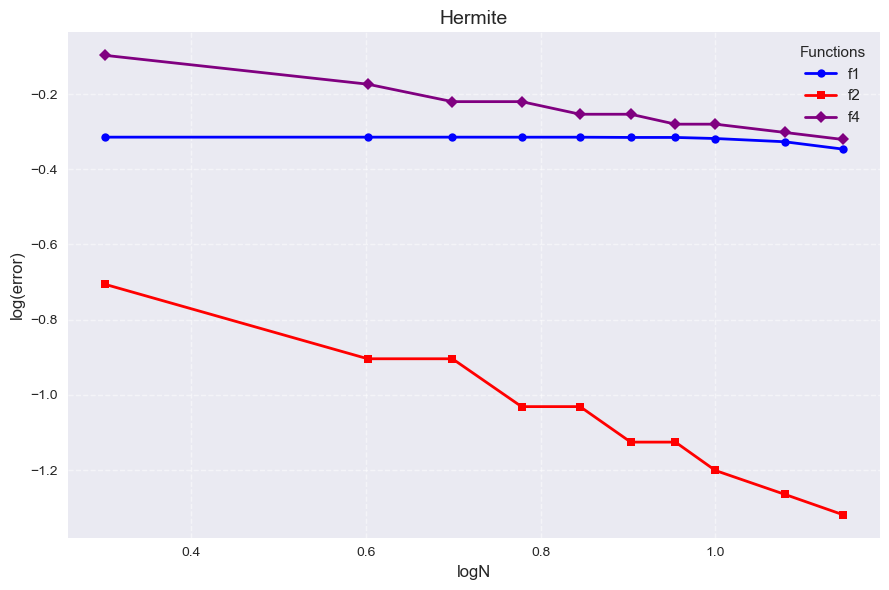

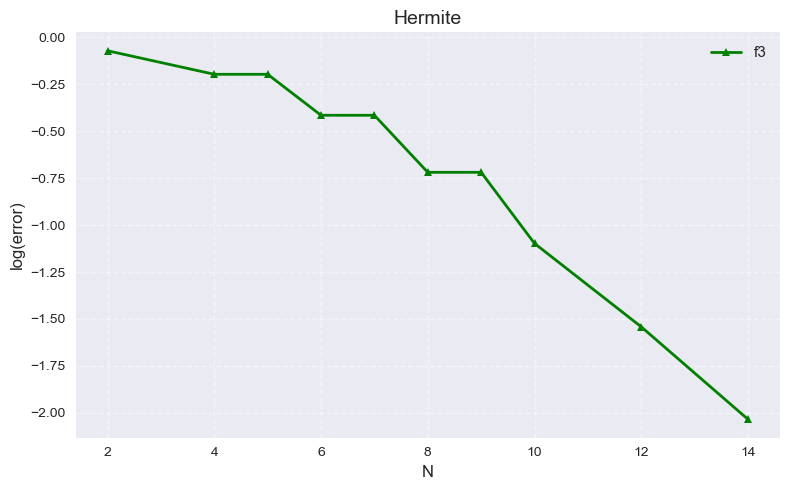

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 画log(error)与logN的坐标图
def plot1(filename):
    file_path = f'../HW4/{filename}_errors.csv'
    df = pd.read_csv(file_path)
    
    plt.style.use('seaborn-v0_8')
    
    colors = {'f1': 'blue', 'f2': 'red', 'f3': 'green', 'f4': 'purple'}
    markers = {'f1': 'o', 'f2': 's', 'f3': '^', 'f4': 'D'}
    output_dir = '../HW4'
    os.makedirs(output_dir, exist_ok=True)
    fig1, ax1 = plt.subplots(figsize=(9, 6))
    for name in ['f1', 'f2', 'f4']:
        data = df[df['Function'] == name]
        ax1.plot(np.log10(data['N']), np.log10(data['Error']),
                 marker=markers[name], label=f'{name}',
                 color=colors[name], linewidth=2, markersize=6)

    ax1.set_xlabel('logN', fontsize=12)
    ax1.set_ylabel('log(error)', fontsize=12)
    ax1.set_title(filename, fontsize=14)
    ax1.legend(title='Functions', fontsize=11, title_fontsize=11)
    ax1.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.tight_layout()
    fig1.savefig(f'{output_dir}/{filename}_error1.png', dpi=300, bbox_inches='tight')
    plt.show(fig1)
    plt.close(fig1)

    if 'f3' in df['Function'].unique():
        fig2, ax2 = plt.subplots(figsize=(8, 5))
        data_f3 = df[df['Function'] == 'f3']
        
        ax2.plot(data_f3['N'], np.log10(data_f3['Error']),
                 marker=markers['f3'], label='f3',
                 color=colors['f3'], linewidth=2, markersize=6)

        ax2.set_xlabel('N', fontsize=12)
        ax2.set_ylabel('log(error)', fontsize=12)
        ax2.set_title(filename, fontsize=14)
        ax2.legend(fontsize=11)
        ax2.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        fig2.savefig(f'{output_dir}/{filename}_error2.png',dpi=300, bbox_inches='tight')
        plt.show(fig2)
        plt.close(fig2)

plot1("Legendre")
plot1("Hermite")

下面的画图仅针对N=2,4,6,8,10,12版本的csv

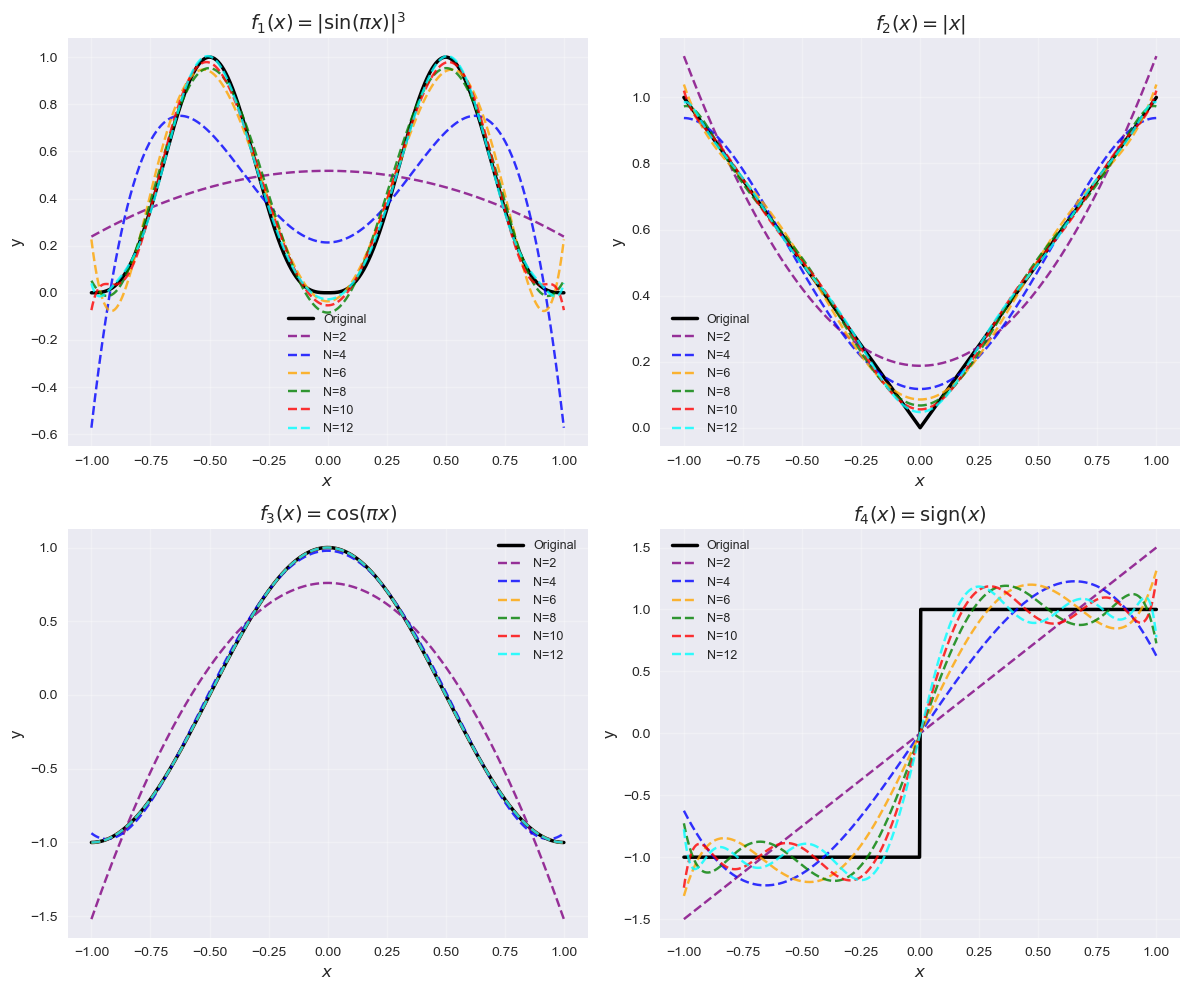

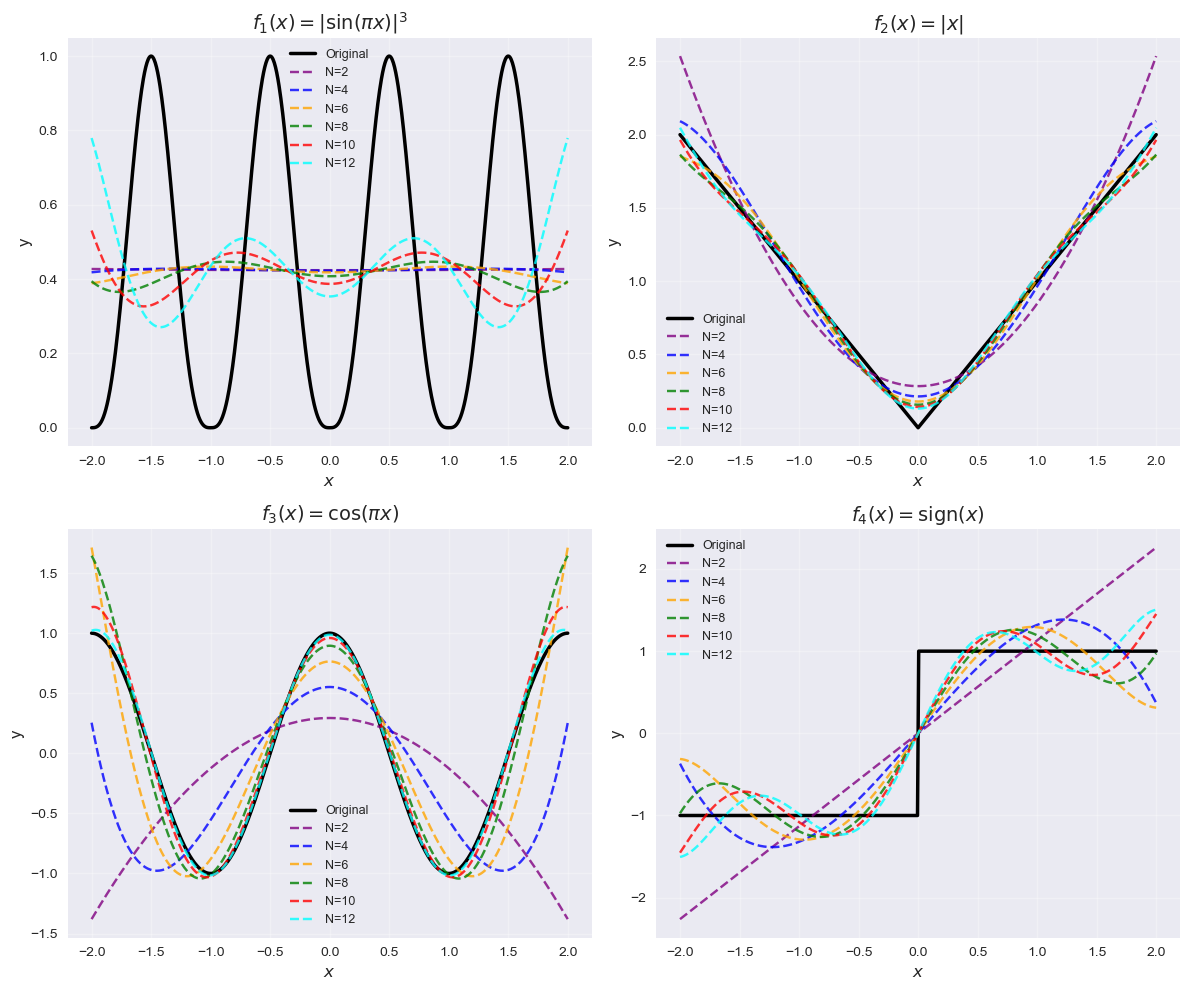

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 画原函数与正交多项式投影的函数
def plot2(filename):
    data_dir = '../HW4'
    functions = ['f1', 'f2', 'f3', 'f4']
    titles = {
        'f1': r'$f_1(x) = |\sin(\pi x)|^3$',
        'f2': r'$f_2(x) = |x|$',
        'f3': r'$f_3(x) = \cos(\pi x)$',
        'f4': r'$f_4(x) = \mathrm{sign}(x)$'
    }

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for idx, name in enumerate(functions):
        file_path = os.path.join(data_dir, f'{filename}_{name}.csv')
        df = pd.read_csv(file_path)
        ax = axes[idx]
        ax.plot(df['x'], df['original'], label='Original', color='black', linewidth=2.5)
        n_colors = {'N=2': 'purple', 'N=4': 'blue', 'N=6': 'orange', 'N=8': 'green', 'N=10': 'red','N=12': 'cyan'}
        for col in df.columns:
            if col.startswith('N='):
                ax.plot(df['x'], df[col], label=col, linestyle='--', color=n_colors.get(col), alpha=0.8)

        ax.set_title(titles[name], fontsize=14)
        ax.set_xlabel('$x$', fontsize=12)
        ax.set_ylabel('y', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=9)

    plt.tight_layout()
    plt.savefig(f'../HW4/{filename}.png', dpi=300, bbox_inches='tight')
    plt.show()

plot2("Legendre")
plot2("Hermite")